In [48]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from functions import plot_formation, plot_formation_trajectories

In [49]:
mat_file_path = './FC_data/data.mat'
mat_data = scipy.io.loadmat(mat_file_path)

In [50]:
K = int(mat_data['K'][0][0])                    # number of iterations
L = mat_data['L']                               # NxN edge weights
M = int(mat_data['M'][0][0])                    # number of edges
N = int(mat_data['N'][0][0])                    # number of agents
R = mat_data['R']                               # covariance matrix
dt = float(mat_data['dt'][0][0])                # timestep
z0 = mat_data['z']                              # Nx2 actual positions 
z_star = mat_data['z_star']                     # Nx2 target positions

np.sum(L, axis=1)

array([ 2.77555756e-17, -2.77555756e-17, -8.32667268e-17,  5.55111512e-17,
        1.11022302e-16, -2.77555756e-17,  0.00000000e+00])

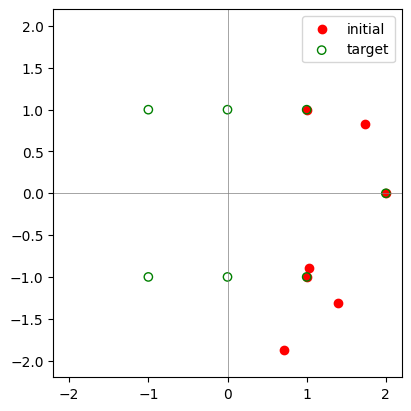

In [51]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(4,4))
ax.axvline(0, color='gray', lw=0.5)
ax.axhline(0, color='gray', lw=0.5)
ax.scatter(z0[:,0], z0[:,1], c='r', label='initial')
ax.scatter(z_star[:,0], z_star[:,1], c='None', edgecolors='g', label='target')
lim = 1.1*np.max(np.abs(z0))
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.legend()

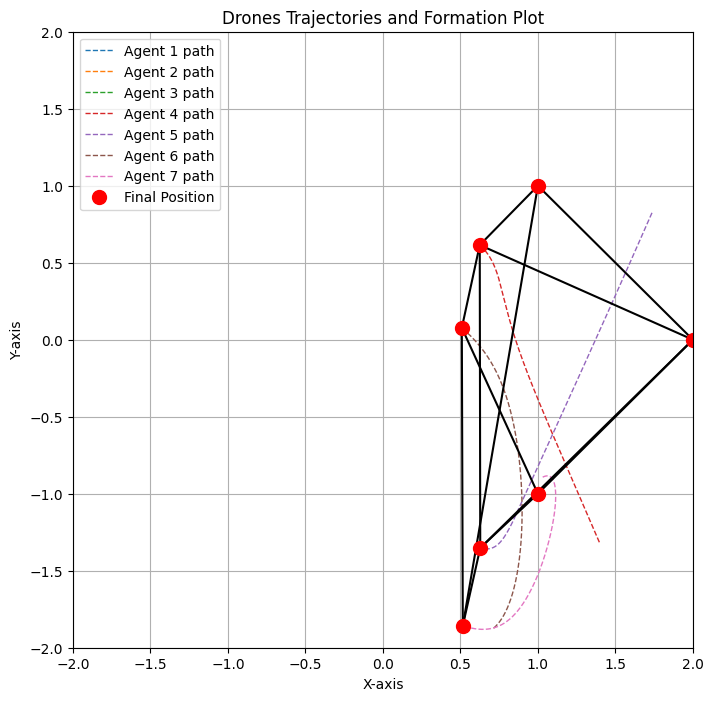

In [ ]:
#Implement algorithm 1 without noise

K = 20000

# Initialization
z = np.zeros((N, 2, K+2))  # Position matrix over time
z[:, :, 0] = z0            # Initialize positions
k = 0

while k <= K:
    for i in range(N):
        if i == 0 or i == 1 or i ==2:  # Skip control for the first drone
            z[i, :, k+1] = z[i, :, k]  # Maintain its position
        else:
            # Get the neighbors of agent i (non-zero weights in row i of L)
            neighbors = np.nonzero(L[i, :])[0]
                        
            # Compute the control input by summing over neighbors
            u = np.zeros(2)  # Initialize control input for agent i
            for j in neighbors:
                u += L[i, j] * (z[i, :, k] - z[j, :, k])
            
            # Update position of agent i
            z[i, :, k+1] = z[i, :, k] + dt * u
    
    k += 1

# Final positions
z_final = z[:, :, K]

# Plot the formation trajectories
plot_formation_trajectories(z)



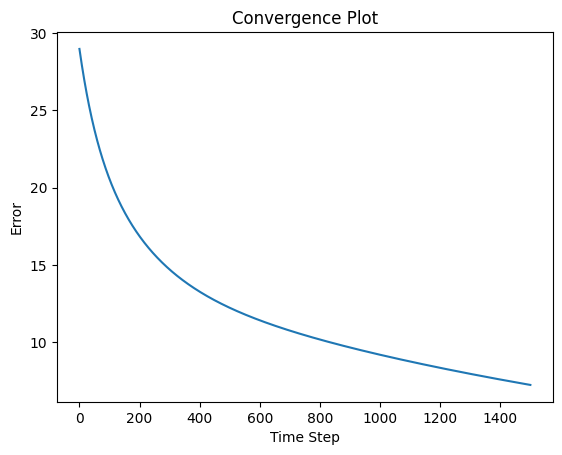

In [53]:
error = []
for k in range(K+1):
    e = np.sum(np.linalg.norm(z[:, :, k] - z_star, axis=1)**2)
    error.append(e)

plt.figure()
plt.plot(range(K+1), error)
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.title('Convergence Plot')
plt.show()